ChEn-3170: Computational Methods in Chemical Engineering Spring 2021 UMass Lowell; Prof. V. F. de Almeida **23Feb21**

# Laboratory Work 03 (24Feb21)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `your name`

### Rubric for each assignment: 

|      Context       |  Points |
|:----------------------------|:-------:|
| Precision of the answer     |  80%    |
| Answer Markdown readability |  10%    |
| Code readability            |  10%    |
    

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
### Table of Assignments<a id="toa"></a>
* [Assignment 1 (20 pts)](#a1) Array data inspection.
 - [1.1)](#a11)(10 pts) Read image data array and crop.
 - [1.2)](#a12)(10 pts) Compute area of hot spot and visualize.
* [Assignment 2 (25 pts)](#a2) Reaction mechanism.
 - [2.1)](#a21)(4 pts) Stoic matrix
 - [2.2)](#a22)(3 pts) Species production.
 - [2.3)](#a23)(3 pts) Compute $\yvec$.
 - [2.4)](#a24)(3 pts) Compute norm of $\yvec$.
 - [2.5)](#a25)(3 pts) Compute $\Amtrx$.
 - [2.6)](#a26)(3 pts) Compute $\Bmtrx$.
 - [2.7)](#a27)(3 pts) Explain $\Amtrx = \Bmtrx$.
 - [2.8)](#a28)(3 pts) Compute matrix subtraction.
* [Assignment 3 (20 pts)](#a3) Forward solver.
 - [3.1)](#a31)(5 pts) Code algorithm.
 - [3.2)](#a32)(5 pts) Demonstrate correctness.
 - [3.3)](#a33)(5 pts) Solve problem with $\Amtrx$.
 - [3.4)](#a34)(5 pts) Solve problem with $\Bmtrx$.
* [Assignment 4 (30 pts)](#a4) Backward solver.
 - [4.1)](#a41)(10 pts) Code algorithm.
 - [4.2)](#a42)(10 pts) Demonstrate correctness.
 - [4.3)](#a43)(5 pts) Solve problem with $\Amtrx$.
 - [4.4)](#a44)(5 pts) Solve problem with $\Bmtrx$.
* [Assignment 5 (5 pts)](#a5) Unclear points.
---

## <span style="color:blue">[Assignment 1 (20 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(10 pts) Import this [image (temperature field)](https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/temperature.png) as an array and crop it as best as you can to show as follows:</span><a id="a11"></a>

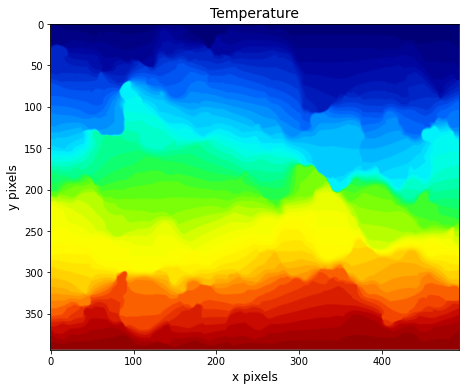

temp data shape (394, 494, 3)


In [2]:
'''1.1) Code'''


### <span style="color:blue">[1.2)](#toa)(10 pts) Scale the red channel by 150 C, the green channel by 90 C, and the blue channel by 40 C. Add the contribution of each channel to compute the resulting temperature. Calculate the area fraction with temperature between 220 C and 240 C and indicate the area on a plot of the array as follows. Explain your method to solve this problem.</span><a id="a12"></a>

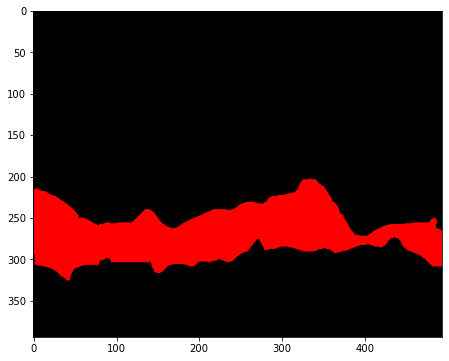

Area fraction [%] = 13.84


In [3]:
'''1.2) Code'''


<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 2 (25 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(4 pts) Build the stoichiometric matrix, $\Smtrx$, of the following reaction mechanism for ethyl-nitrite pyrolysis (order the reactions as shown by the Id. column in the table). Print the matrix indicating its shape and the species vector. Plot the matrix.</span><a id="a21"></a>

| Id | Reaction mechanism             |        
|----|--------------------------------|
|1   |C2H5ONO      <=> C2H5O   + NO   | 
|2   |C2H5O        <=> CH3     + CH2O | 
|3   |C2H5O + NO   <=> CH3CHO  + HNO  |
|4   |C2H5O + HNO  <=> C2H5OH  + NO   | 
|5   |2 NOH        <=> N2O     + H2O  | 
|6   |CH3 + NO     <=> CH3NO          |
|7   |CH3NO        <=> CH2=NOH        | 
|8   |CH2=NOH      <=> HCN     + H2O  | 

r0 :  C2H5ONO     <=> C2H5O   + NO
r1 :  C2H5O       <=> CH3     + CH2O
r2 :  C2H5O + NO  <=> CH3CHO  + HNO
r3 :  C2H5O + HNO <=> C2H5OH  + NO
r4 :  2 NOH       <=> N2O     + H2O
r5 :  CH3 + NO    <=> CH3NO
r6 :  CH3NO       <=> CH2=NOH
r7 :  CH2=NOH     <=> HCN     + H2O
n_reactions = 8
matrix shape = (8, 14)


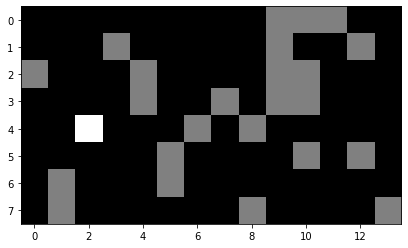

In [4]:
'''Build stoichimetric matrix'''


### <span style="color:blue">[2.2)](#toa)(3 pts) Given the reaction rate density vector [mol/(s cc)] below, calculate the species production rate density vector.</span><a id="a22"></a>
<br>
<span style="color:blue">
$\rvec = \begin{pmatrix}
1.7, \\
0.6, \\
0.4, \\
0.2, \\
0.2, \\
0.8, \\
0.3, \\
0.4
 \end{pmatrix}
$
</span>

In [6]:
'''Code to calculate species production'''


species production rates =
 [ 0.3501 -0.1164 -0.343   0.6427  0.1762  0.4836  0.1715  0.1739  0.5826  0.507   0.7193 -1.6737
 -0.1356  0.4111]


### <span style="color:blue">[2.3)](#toa)(3 pts) Compute the vector $\yvec = \Smtrx\,\gvec$ and print the results with up to 3 decimals precision. Why should you get the same answer no matter the order of the $\gvec$ vector is?</span><a id="a23"></a> 

In [7]:
'''2.3) Code'''


y = [ 2.9000e+00  2.7756e-17 -7.0000e-01  2.1000e-01  1.4400e+00 -1.0000e-01 -6.0000e-01  1.1100e+00]


<span style="color:blue">**Answer:**</span>

### <span style="color:blue">[2.4)](#toa)(3 pts) Compute the norm $\norm{\yvec}$ and print the result in exponential scientific format with 4 decimals.</span><a id="a24"></a> 

In [8]:
'''2.4) Code'''


||y|| = 3.5524e+00


### <span style="color:blue">[2.5)](#toa)(3 pts) Compute the matrix $\Amtrx = \frac{1}{3}\,\Smtrx\Smtrx^\top$, print the result with up to 3 decimals precision. Why is this matrix the same when you change the order of the species in $\Smtrx$?</span><a id="a25"></a> 

In [9]:
'''2.5) Code'''


A =
 [[ 1.     -0.3333 -0.6667  0.      0.     -0.3333  0.      0.    ]
 [-0.3333  1.      0.3333  0.3333  0.     -0.3333  0.      0.    ]
 [-0.6667  0.3333  1.3333 -0.3333  0.      0.3333  0.      0.    ]
 [ 0.      0.3333 -0.3333  1.3333  0.     -0.3333  0.      0.    ]
 [ 0.      0.      0.      0.      2.      0.      0.      0.3333]
 [-0.3333 -0.3333  0.3333 -0.3333  0.      1.     -0.3333  0.    ]
 [ 0.      0.      0.      0.      0.     -0.3333  0.6667 -0.3333]
 [ 0.      0.      0.      0.      0.3333  0.     -0.3333  1.    ]]
shape = (8, 8)


<span style="color:blue">**Answer:**</span>

### <span style="color:blue">[2.6)](#toa)(3 pts) Compute the matrix $\Bmtrx = \frac{1}{3}\,\Smtrx^\top\Smtrx$, print the result with up to 3 decimals precision. Why this matrix may not be the same as yours (see below)? When will it be the same as yours?</span><a id="a26"></a> 

In [10]:
'''2.6) Code'''


B =
 [[ 0.3333  0.      0.      0.      0.3333  0.      0.      0.      0.     -0.3333 -0.3333  0.      0.      0.    ]
 [ 0.      0.6667  0.      0.      0.     -0.3333  0.      0.     -0.3333  0.      0.      0.      0.     -0.3333]
 [ 0.      0.      1.3333  0.      0.      0.     -0.6667  0.     -0.6667  0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.3333  0.      0.      0.      0.      0.     -0.3333  0.      0.      0.3333  0.    ]
 [ 0.3333  0.      0.      0.      0.6667  0.      0.     -0.3333  0.      0.     -0.6667  0.      0.      0.    ]
 [ 0.     -0.3333  0.      0.      0.      0.6667  0.      0.      0.      0.     -0.3333  0.     -0.3333  0.    ]
 [ 0.      0.     -0.6667  0.      0.      0.      0.3333  0.      0.3333  0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.     -0.3333  0.      0.      0.3333  0.     -0.3333  0.3333  0.      0.      0.    ]
 [ 0.     -0.3333 -0.6667  0.      0.      0.      0.3333  0.      0.6667  

<span style="color:blue">**Answer:**</span>

### <span style="color:blue">[2.7)](#toa)(3 pts) Is $\Amtrx = \Bmtrx$? Explain.</span><a id="a27"></a> 

In [ ]:
'''2.7) Code'''

<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[2.8)](#toa)(3 pts) Compute $\Amtrx - \Amtrx^\top$. Explain the result.</span><a id="a28"></a> 

In [ ]:
'''2.8) Code'''


<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 3 (20 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">[3.1)](#toa)(5 pts) Program a forward solver (*i.e.* write your code) for lower triangular system $\Lmtrx\,\xvec=\bvec$. The algorithm is as follows: </span>

<span style="color:blue">
\begin{equation*}
  x_i = \Bigl(b_i - \sum\limits_{j=1}^{i-1} L_{i,j}\,x_j \Bigr)\,L^{-1}_{i,i} \ \ \forall \ \ i=1,\ldots,m ,
\end{equation*}
</span>

### <span style="color:blue">for $i$ and $j$ with offset 1. Recall that `NumPy` and `Python` have offset 0 for their sequence data types.</span><a id="a31"></a> 

In [13]:
'''3.1) Code'''


### <span style="color:blue">[3.2)](#toa)(5 pts) Demonstrate your code is correct (do not compare against another solver) and provide an output example for $\Lmtrx$, $\bvec$, and $\xvec$ (use at least 7 unknowns).  </span><a id="a32"></a> 

In [ ]:
'''3.2) Test L x = b'''


### <span style="color:blue">[3.3)](#toa)(5 pts) Using the lower triangular portion of $\Amtrx$ as $\Lmtrx$, compute the solution of $\Lmtrx\xvec=\rvec$.</span><a id="a33"></a>

In [15]:
'''3.3) Code'''


l_mtrx =
 [[ 1.      0.      0.      0.      0.      0.      0.      0.    ]
 [-0.3333  1.      0.      0.      0.      0.      0.      0.    ]
 [-0.6667  0.3333  1.3333  0.      0.      0.      0.      0.    ]
 [ 0.      0.3333 -0.3333  1.3333  0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      2.      0.      0.      0.    ]
 [-0.3333 -0.3333  0.3333 -0.3333  0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      0.     -0.3333  0.6667  0.    ]
 [ 0.      0.      0.      0.      0.3333  0.     -0.3333  1.    ]]

x_vec = [1.6737 1.2006 0.7993 0.0301 0.0857 1.48   1.182  0.7765]


### <span style="color:blue">[3.4)](#toa)(5 pts) Using the lower triangular portion of $\Bmtrx$ as $\Lmtrx$, compute the solution of $\Lmtrx\xvec=\gvec$. Do you get the same solution as below? Explain?</span><a id="a34"></a>

In [16]:
'''3.4) Code'''



x_vec = [ 0.3     0.45    0.0225  0.3     0.3     1.575   0.345   0.33    2.175   0.4575  1.0219 -3.9206  0.6553 -1.695 ]


<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 4 (30 pts)](#toa)</span><a id="a4"></a>

### <span style="color:blue">[4.1)](#toa)(10 pts) Program a backward solver (*i.e.* write your code) for an upper triangular system $\Umtrx\,\xvec=\bvec$. The algorithm is as follows: </span>

<span style="color:blue">
\begin{equation*}
x_i = \Bigl(b_i - \sum\limits_{j=i+1}^{m} U_{i,j}\,x_j \Bigr)\,U^{-1}_{i,i} \ \ \forall \ \ i=m,\ldots,1 ,
\end{equation*}
</span>

### <span style="color:blue">for $i$ and $j$ with offset 1. Recall that `NumPy` and `Python` have offset 0 for their sequence data types. </span><a id="a41"></a>

In [17]:
'''4.1) Code'''


### <span style="color:blue">[4.2)](#toa)(10 pts) Demonstrate your code is correct (do not compare against another solver) and provide an output example for $\Umtrx$, $\bvec$, and $\xvec$ (use at least 7 unknowns). </span><a id="a42"></a> 

In [ ]:
'''4.2) Test U x = b'''


### <span style="color:blue">[4.3)](#toa)(5 pts) Using the upper triangular portion of $\Amtrx$ as $\Umtrx$, compute the solution of $\Umtrx\xvec=\rvec$.</span><a id="a43"></a>

In [19]:
'''4.3) Code'''


u_mtrx =
 [[ 1.     -0.3333 -0.6667  0.      0.     -0.3333  0.      0.    ]
 [ 0.      1.      0.3333  0.3333  0.     -0.3333  0.      0.    ]
 [ 0.      0.      1.3333 -0.3333  0.      0.3333  0.      0.    ]
 [ 0.      0.      0.      1.3333  0.     -0.3333  0.      0.    ]
 [ 0.      0.      0.      0.      2.      0.      0.      0.3333]
 [ 0.      0.      0.      0.      0.      1.     -0.3333  0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.6667 -0.3333]
 [ 0.      0.      0.      0.      0.      0.      0.      1.    ]]

x_vec = [2.3481 0.8114 0.1088 0.379  0.0172 0.9941 0.6476 0.4111]


### <span style="color:blue">[4.4)](#toa)(5 pts) Using the upper triangular portion of $\Bmtrx$ as $\Umtrx$, compute the solution of $\Umtrx\xvec=\gvec$. Do you get the same solution as below? Explain.</span><a id="a44"></a>

In [20]:
'''4.4) Code'''



x_vec = [-0.9994  2.0513  0.1725 -0.8438 -0.3694  1.0875 -1.785   0.0113  2.085  -0.8437 -0.825  -5.4     0.3     0.03  ]


<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 5 (5 pts)](#toa)</span><a id="a5"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>